# Bagging

## Bootstrap Aggregation (Bagging)

- Sample $ \mathcal{D}^{(1)}, \dots, \mathcal{D}^{(K)} $ with replacement from $ \mathcal{D}^{\text{Train}} \in (\mathcal{X} \times \mathcal{Y})^N $ .
- The distribution of sampling one instance \( I \) is:

$$
P((x, y) \mid \mathcal{D}^{\text{Train}}) = \frac{1}{N}.
$$

- Sample a bootstrap $\mathcal{D}^{(k)} \sim I^n $ with replacement, where $ n = |\mathcal{D}^{(k)}|$  and  $n \leq N $.

- Train one model per bootstrap and aggregate an ensemble:

$$
\hat{f}(x) = \frac{1}{K} \sum_{k=1}^K \hat{f}^{(k)}(x).
$$

- Notice that \( \mathcal{D}^{(k)}, \forall k \) are **not i.i.d.** since they share instances:

$$
\hat{f}(x) \not\to \bar{f}, \, \mathbb{E}_x \left[ (\hat{f}(x) - \bar{f}(x))^2 \right] \not\to 0.
$$

---

## Bagging Requires Uncorrelated Models

- Models make errors \( \epsilon_k \) for \( k = 1, \dots, K \) in a regression task.

- Assume \( \epsilon_k \) is drawn from a multivariate normal distribution with mean \( 0 \), variance \( \mathbb{E}[\epsilon_k^2] = v \), and covariances \( \mathbb{E}[\epsilon_k \epsilon_l] = c \).

- The overall error of the ensemble is:

$$
\frac{1}{K} \sum_{k=1}^K \epsilon_k.
$$

- The expected squared error of the ensemble is:

$$
\mathbb{E} \left[ \left( \frac{1}{K} \sum_{k=1}^K \epsilon_k \right)^2 \right] =
\frac{1}{K^2} \mathbb{E} \left[ \sum_{k=1}^K \left( \epsilon_k^2 + \sum_{k \ne l} \epsilon_k \epsilon_l \right) \right].
$$

Expanding:

$$
\mathbb{E} \left[ \left( \frac{1}{K} \sum_{k=1}^K \epsilon_k \right)^2 \right] =
\frac{1}{K} v + \frac{K-1}{K} c.
$$

---

### Two Cases:

1. **If errors are correlated** (\( c = v \)):

$$
\text{Squared error} = v.
$$

2. **If errors are uncorrelated** (\( c = 0 \)):

$$
\text{Squared error} = \frac{v}{K}.
$$

- In **(A)**, where errors are correlated, the ensemble does not help.

- In **(B)**, where errors are uncorrelated, the error is reduced **linearly** with \( K \).


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [67]:
np.random.seed(42)

In [68]:
N = 50
noise = np.random.normal(0, 0.5, N)

X = np.linspace(0, 10, N)
X_continues = np.linspace(0, 10, 1000)
y = 0.5 * X + 10 + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [69]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (40,)
y_train shape: (40,)
X_test shape: (10,)
y_test shape: (10,)


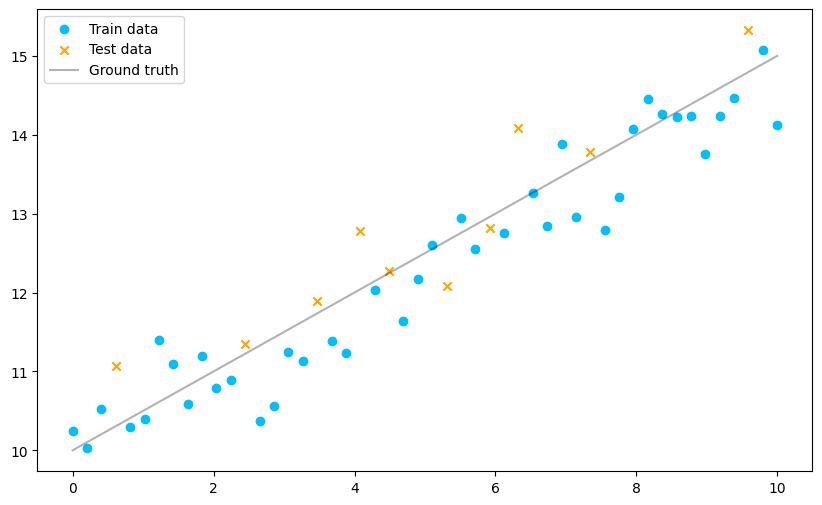

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='deepskyblue', label='Train data')
plt.scatter(X_test, y_test, color='orange', label='Test data', marker='x')
plt.plot(X_continues, 0.5*X_continues + 10, label='Ground truth', color='black', alpha=0.3)
plt.legend()
plt.show()

In [71]:
def sample_with_replacement(X_train: np.array, y_train: np.array, samples: int= 1000) -> tuple[np.array, np.array]:
    N = X_train.shape[0]
    idx = np.arange(N)